In [28]:

from instaloader import Instaloader, Profile
from itertools import islice
from math import ceil
from PIL import Image
from io import BytesIO
import requests
from IPython.display import display, HTML
import base64

user_name = 'masonashford6'
password = '!X$4nai7!B*!dmA4'

In [3]:
Instagram = Instaloader()

task = 'load' # either load or login

if task == 'load':
    Instagram.load_session_from_file(user_name)
elif task == 'login':
    Instagram.login(user_name, password)

#SAVE SESSION
Instagram.save_session_to_file()
#Saved session to C:\Users\Justus Tobias\AppData\Local\Instaloader\session-masonashford6.

Loaded session from C:\Users\Justus Tobias\AppData\Local\Instaloader\session-masonashford6.
Saved session to C:\Users\Justus Tobias\AppData\Local\Instaloader\session-masonashford6.


In [4]:
#GET STORIES
stories = Instagram.get_stories()

In [5]:
story_items = []
for story in stories:
    story_items.append(story.get_items())
    print(story.get_items())



<generator object Story.get_items at 0x000002080F4E29D0>
<generator object Story.get_items at 0x000002080F4E2AB0>
<generator object Story.get_items at 0x000002080F4E2B90>
<generator object Story.get_items at 0x000002080F4E2C70>
<generator object Story.get_items at 0x000002080F4E2D50>
<generator object Story.get_items at 0x000002080F4E2E30>
<generator object Story.get_items at 0x000002080F4E2F10>
<generator object Story.get_items at 0x000002080F4E2FF0>
<generator object Story.get_items at 0x000002080F4E30D0>


In [6]:
#GET FEED
feed = Instagram.get_feed_posts()

In [7]:

feed_items = []
for post in feed:
    feed_items.append(post)
    print(post)

<Post CpgZ-dWs13F>
<Post CpfwO3Ct9Z6>
<Post Cpf7EJbJJGp>
<Post CphQ8GHA3l1>
<Post CpcSPFUIHy4>
<Post CpbTtsNjqWm>
<Post Cpf_ACkI0A7>
<Post Cpckp8LDsBP>
<Post CpdxKuepkJR>
<Post CpgDhHwDGaW>
<Post CpdJxpwusim>
<Post CpiPHKFIYOH>
<Post CpfbPYIDFCX>
<Post Cpf390_Isn->
<Post Cph04yujfJ6>
<Post CpcYW_zD-i9>
<Post CpdJs7wg-tN>
<Post CpfLgpgj0WX>
<Post CpdAnLrImJz>
<Post CpiCkhPNtQq>
<Post CpgoQFrMq_L>
<Post CpdvXrujT2z>
<Post CpcyI-tD9RD>
<Post CpdOzkCofFP>
<Post CpdfQRDDZFl>
<Post Cpc6TiCIYfa>
<Post CpbQbMuMzS->
<Post CpiGctDD3Hg>
<Post Cpdi9sVNBOD>
<Post Cpgjt3SsjgV>
<Post CpfvH1Su8hj>
<Post CpdUY4sod_K>
<Post Cpha-vZDeMK>
<Post CpfGezky-ld>
<Post CpbMc90sGS9>
<Post CpdMMbNITTX>
<Post CpbEdOhDE5z>
<Post CpbOj--oTQ3>
<Post Cpd0TYiDczA>
<Post CpiNIIWjnX1>
<Post CphhMOGoKqu>
<Post Cpfh626o-dS>
<Post CpbCtqyItEE>
<Post CpduMttI5Hx>
<Post Cphg_dyLz7u>
<Post Cpgnj8UNrXD>
<Post CpeIoTXoR1N>
<Post CpgHQjMoSNA>
<Post Cpfoo6UM6_H>
<Post CphyehIItwv>
<Post CpgfHyCsxQA>
<Post CpfSezvohuJ>
<Post CpfMwt


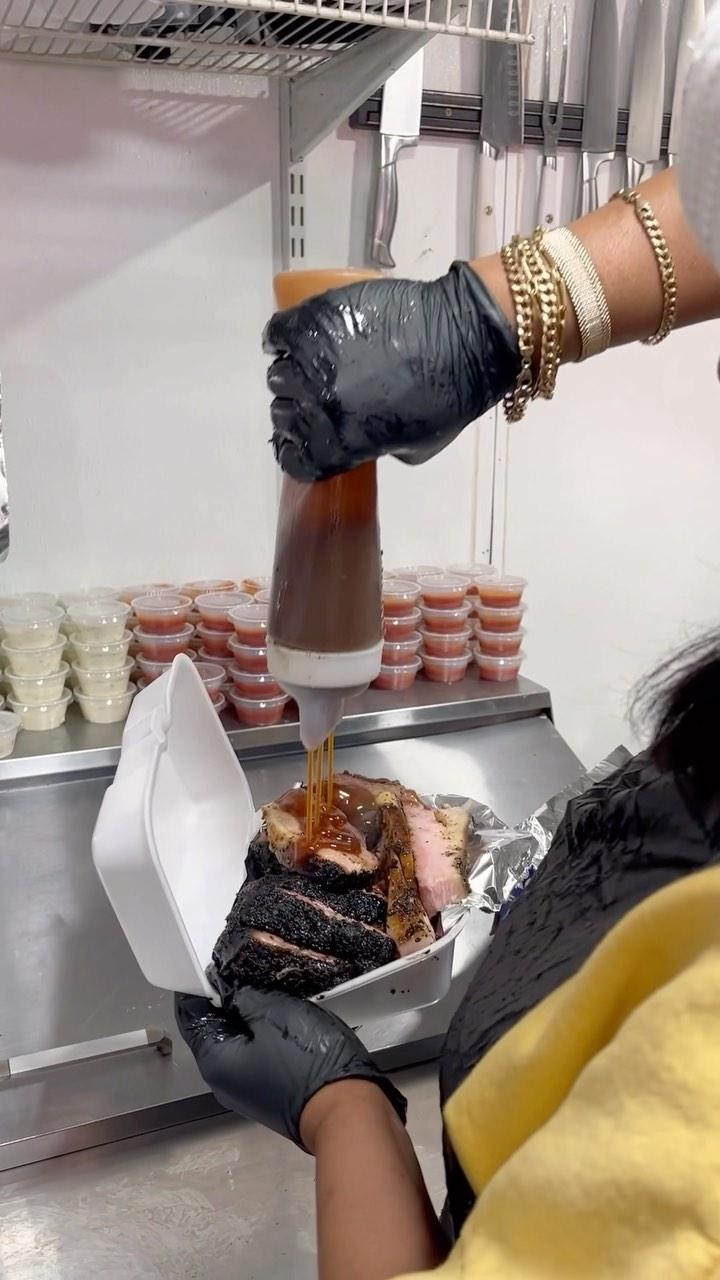

In [56]:



def repr_post (post: object, Instagram: Instaloader, get_profile_information: bool):
    examplary_post = post

    #GET ALL INFORMATION AND/OR METADATA FROM THE POST

    is_video = examplary_post.is_video

    if is_video:
        post_type = "Reel"
    else:
        post_type = "Image"
    
    short_code = examplary_post.shortcode
    num_likes =  examplary_post.likes
    caption = examplary_post.caption
    hashtags = examplary_post.caption_hashtags
    profile = examplary_post.profile
    id = examplary_post.mediaid
    num_comments = examplary_post.comments
    location = examplary_post.location
    date = examplary_post.date_local
    owner_username = examplary_post.owner_username

    #get some Information about the Profile
    profile_name = examplary_post.profile
    owner_username = examplary_post.owner_username
    num_followers = "None"
    like_follower_ratio = "None"

    if get_profile_information:
        profile = Profile.from_username(Instagram.context, profile_name)
        num_followers = profile.followers
        like_follower_ratio = num_likes / num_followers
    




    #download and show picutre
    image_url = examplary_post.url
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    img_buffer = BytesIO()
    img.save(img_buffer, format='JPEG')
    img_str = base64.b64encode(img_buffer.getvalue()).decode()

    # Create an HTML code string using an f-string
    html_code = f"""
    <div style="background-color: white; color: #333; padding: 20px;">
        <h1>Instagram Post</h1>
        <p><strong>Profile:</strong> {profile_name}</p>
        <img src="data:image/jpeg;base64,{img_str}" alt="post image" width="500">
        <p><strong>Caption:</strong> {caption}</p>
        <br></br>
        <h2>Metadata</h2>
        <p><strong>Short Code:</strong> {short_code}</p>
        <p><strong>ID:</strong> {id}</p>
        <p><strong>Owner Username:</strong> {owner_username}</p>
        <p><strong>Post Type:</strong> {post_type}</p>
        <p><strong>Number of Likes:</strong> {num_likes}</p>
        <p><strong>Number of Followers:</strong> {num_followers}</p>
        <p><strong>Like-Follower Ratio:</strong> {like_follower_ratio}</p>
        <p><strong>Number of Comments:</strong> {num_comments}</p>
        <p><strong>Hashtags:</strong> {hashtags}</p>
        <p><strong>Location:</strong> {location}</p>
        <p><strong>Date:</strong> {date}</p>
    </div>
    """

    # Display the HTML code as a webpage in the Jupyter notebook
    display(HTML(html_code))
    return html_code


_ = repr_post(feed_items[30], Instagram, False)

In [ ]:
Instagram.po

In [45]:
PROFILE = 'paris.explore'
profile = Profile.from_username(Instagram.context, PROFILE)
profile.get_followers()
profile.followers

959557

In [10]:
# Get All Pictures of a Profile just by It's Profilename

def get_all_picutres_of_profile_by_profilname (profilename: str):
    """
    this function downloads all pictures from the account with the given profilename
    it creates and folder with the profilename and saves all Posts to it
    """

    # get a profile by its username
    profile = Profile.from_username(Instagram.context, profilename)

    # download all the pictures from the profile
    for post in profile.get_posts():
        Instagram.download_post(post, target=profile.username)
